## Исследование данных о российском кинопрокате



**Исследование проводится по заказу Министерства культуры Российской Федерации**


**Цель:** 
 - изучить рынок российского кинопроката и выявить текущие тренды
 
**Задачи:**

* проанализировать динамику проката по годам
* рассмотреть зависимость кассовых сборов в кинотеатрах от возрастных ограничений
* выявить особенности кинопроката фильмов, получивших гос.поддержку

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [24]:
#загрузка необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
movies = pd.read_csv('/datasets/mkrf_movies.csv')
shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


*Изучила общую информацию о двух данных датасетах.*

По столбцу 'puNumber' (номер прокатного удостоверения) соединю два датасета.

Т.к. эти столбцы имеют разный тип данных, то для начала приведу к одному типу (str).

После этого объединю данные.

In [6]:
shows['puNumber'] = shows['puNumber'].astype('str')

In [7]:
movies = movies.merge(shows, on = 'puNumber', how = 'left')
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<div class="alert alert-block alert-info">
Посмотрим на датасет после объединения.
</div>

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

*Теперь в одном датасете есть вся необходимая для исследования информация.*

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

В столбце "show_start_date" тип данных должен быть datetime. Приведем к этому типу.

In [12]:
movies['show_start_date'] = pd.to_datetime(movies['show_start_date'], format = '%Y-%m-%dT%H:%M:%S.000Z')

В столбце "ratings" тип данных должен быть float. Приведем к этому типу.

Для этого посмотрим на уникальные значения в этом столбце.

In [13]:
movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Видно, что просто так тип данных не преобразовать, т.к. есть значения со знаком %. Эти значения по сути не ошибочны, просто записаны в формате процентов. Поэтому мы их преобразуем в такие же значения, но по десятибальной шкале.

Сделаем следующие действия:

* очистим данные от знака %
* полученные значения переведем в тип float
* значения, которые больше 10, разделим на 10



In [14]:
movies['ratings'] = movies['ratings'].str.replace('%','')
i=0
for r in movies['ratings']:
    r_new = float(r) 
    if r_new > 10:
        movies.loc[i,'ratings'] = r_new/10
    else:    
        movies.loc[i,'ratings'] = r_new
    i+=1    
movies['ratings'] = movies['ratings'].astype('float')        

В столбце "age_restriction" данные представляют собой категории, а не числа, обозначающие возраст. Поэтому тип данных у этого столбца оставим str. 

Но для удобства работы запишем их по другому.

In [15]:
movies['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [16]:
i=0
for age in movies['age_restriction']:
    if age == '«0+» - для любой зрительской аудитории':    
        movies.loc[i,'age_restriction'] = '0+'
    elif age == '«6+» - для детей старше 6 лет':    
        movies.loc[i,'age_restriction'] = '6+'
    elif age == '«12+» - для детей старше 12 лет':    
        movies.loc[i,'age_restriction'] = '12+'    
    elif age == '«16+» - для детей старше 16 лет':    
        movies.loc[i,'age_restriction'] = '16+'
    elif age == '«18+» - запрещено для детей':
        movies.loc[i,'age_restriction'] = '18+'
    i+=1  
movies['age_restriction'].unique()    

array(['18+', '6+', '12+', '16+', '0+'], dtype=object)

In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   object        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Видно, что все столбцы приведены к нужному типу данных.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

По информации выше видно, что пропуски есть в столбцах:
* film_studio
* production_country
* director
* producer   
* refundable_support       
* nonrefundable_support    
* budget  
* financing_source      
* ratings      
* genres      
* box_office 

В столбцах "film_studio", "production_country", "director", "producer", "genres" пропуски заполним значением "unknown", т.к. никак логически эти пропуски не заполнить. 

В столбцах "refundable_support", "nonrefundable_support", "budget" пропуски заполним 0, потому что данные заполнены только там, где фильм получил гос.поддержку. Значит в остальных случаях нет гос.поддержки, т.е. она равно 0.

В столбце "financing_source" указана организация, которая оказала гос.поддержку. Если значение пропущено, значит нет гос.поддержки, нет организации, поэтому заполним пропуски значением 'No' 

In [25]:
s1 = ['director','producer','genres','production_country','film_studio']
s2 = ['refundable_support','nonrefundable_support','budget']

for skip in s1:
    movies[skip] = movies[skip].fillna('unknown')
    
for skip in s2:
    movies[skip] = movies[skip].fillna(0.0)
    
movies['financing_source'] = movies['financing_source'].fillna('No')

Остались пропущенные значения в столбцах "ratings" и "box_office". Их заполнить можно только вручную, осуществив поиск в интернете, а логически никак нельзя заполнить, поэтому оставим пропуски в этих столбцах.

In [26]:
movies.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   object        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7486 non-null   object        
 5   production_country     7486 non-null   object        
 6   director               7486 non-null   object        
 7   producer               7486 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     7486 non-null   float64       
 10  nonrefundable_support  7486 non-null   float64       
 11  budget                 7486 non-null   float64       
 12  financing_source       7486 non-null   object        
 13  rat

На этом этапе я заполнила пропуски в данных логически вытекающими значениями. 

В двух столбцах пропуски остались.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Для начала я приведу значения в столбце "title" к нижнему регистру. Это позволит выявить явные дубликаты, если они есть.

In [27]:
movies['title'] = movies['title'].str.lower()

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Изучу следующие категориальные столбцы:
* type
* film_studio
* financing_source
* genres

Для этого посмотрю уникальные значения в столбцах.

In [28]:
movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [29]:
movies['type'] = movies['type'].str.strip()
movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [30]:
len(movies['film_studio'].unique())

5491

In [31]:
movies['film_studio'] = movies['film_studio'].str.strip()
len(movies['film_studio'].unique())

5463

In [32]:
movies['financing_source'].unique()

array(['No', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [33]:
len(movies['genres'].unique())

743

In [34]:
movies['genres'] = movies['genres'].str.strip()
len(movies['genres'].unique())

743

В столбце "type" я увидела, что из-за пробела в начале или в конце возникают дубликаты. Поэтому я удалила пробелы в этом столбце.

В других вышеперечисленных столбцах такая проблема тоже могла бы быть и привести к возникновению дубликатов. Поэтому и в этих столбцах я провела удаление пробелов.

Теперь удалю явные дубликаты, которые могли возникнуть после проведенных манипуляций.

In [35]:
movies.drop_duplicates().reset_index(drop = True)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,0.0,0.0,0.0,No,7.2,"боевик,драма,мелодрама",NaN
1,особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,6+,0.0,0.0,0.0,No,6.6,"драма,военный",NaN
2,особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,0.0,No,6.8,"фантастика,боевик,триллер",NaN
3,особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,0.0,No,6.8,"фантастика,боевик,триллер",NaN
4,особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,0.0,No,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,сад художника: американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,12+,0.0,0.0,0.0,No,NaN,unknown,NaN
7482,звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",16+,0.0,0.0,0.0,No,5.4,"боевик,триллер",NaN
7483,щенячий патруль: скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,0+,0.0,0.0,0.0,No,NaN,unknown,NaN
7484,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,0+,0.0,0.0,0.0,No,NaN,unknown,NaN


Я проверила на дубликаты категориальные столбцы. Для этого я привела к нижнему регистру столбец "title", а так же удалила пробелы в столбцах "type", "film_studio", "financing_source", "genres".

Дубликатов не обнаружилось. Количество строк в датасете осталось таким же.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Известно, что в столбце "budget" указана полная стоимость производства фильма. 

В столбцах "refundable_support", "nonrefundable_support" указана государственная субсидия, которая выделяется государством на съемки фильма. 

Сумма этих двух столбцов не может превышать сумму бюджета фильма, но может быть меньше, чем бюджет, т.к. продюсеры фильма могли найти деньги на производство в частных (негосударственных) компаниях.

Проверим, есть ли строки, где сумма гос.поддержки превышает бюджет фильма.

In [36]:
movies.loc[movies['refundable_support'] + movies['nonrefundable_support'] > movies['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16+,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12+,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16+,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,савва. сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,6+,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",18+,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12+,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12+,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Да, такие данные нашлись. Видно, что бюджет таких фильмов указан 0. Такого не может быть. Здесь явная ошибка в данных.

Чтобы ее исправить, я в такие ячейки столбца "budget" запишу сумму столбцов "refundable_support" и "nonrefundable_support". Будем считать, что эти фильмы сняты только засчет гос.поддержки. 

In [37]:
i=0
for fin in movies['budget']:
    ref = movies.loc[i,'refundable_support']
    nonref = movies.loc[i,'nonrefundable_support']
    if ref + nonref > movies.loc[i,'budget']:
        movies.loc[i,'budget'] = ref + nonref
    i+=1
  

Посмотрим, есть ли фильмы, где бюджет ненулевой (т.е. в данном случае это фильмы, снятые с гос.поддержкой), но в то же время подозрительно маленький. 

Посмотрю, сколько фильмов потратили на производство менее 10 млн. рублей

In [43]:
movies.loc[(movies['budget'] < 10**7) & (movies['budget'] > 0.0)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre
2874,помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12+,0.0,6000000.0,6000000.0,Министерство культуры,4.3,комедия,15362931.43,2016,В.Ровенский,комедия


Такой фильм всего один. Остальные тратят на производство более 10 млн.рублей - это адекватно.

Посмотрю, есть ли фильмы с аномально низкими кассовыми сборами в кинотеатрах, допустим менее 10 тыс.рублей

In [44]:
movies.loc[movies['box_office'] < 10**4]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre
6,любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,12+,0.0,0.0,0.0,No,8.3,"мелодрама,комедия",2700.0,2013,В.Меньшов,мелодрама
18,неподдающиеся,111003616,2016-02-12 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,unknown,6+,0.0,0.0,0.0,No,8.0,"мелодрама,комедия",360.0,2016,Ю.Чулюкин,мелодрама
19,неподсуден,111003716,2016-02-12 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",unknown,6+,0.0,0.0,0.0,No,7.7,драма,420.0,2016,В.Краснопольский,драма
22,"операция ""ы"" и другие приключения шурика",111007413,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,unknown,6+,0.0,0.0,0.0,No,8.7,"комедия,мелодрама,криминал",380.0,2013,Л.Гайдай,комедия
38,мужики!..,111007213,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,unknown,6+,0.0,0.0,0.0,No,8.1,драма,1165.0,2013,И.Бабич,драма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,шпион,111009411,2011-12-09 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова",Россия,А.Андрианов,"С.Шумаков, Л.Верещагин",16+,0.0,0.0,0.0,No,7.1,"боевик,комедия,криминал",5405.0,2011,А.Андрианов,боевик
5388,воин.com,111004411,2011-07-04 12:00:00,Художественный,"ООО ""Культурные инициативы""",Россия,Е.Бычкова,"В.Малышев, А.Малышев",12+,0.0,0.0,0.0,No,4.7,комедия,465.0,2011,Е.Бычкова,комедия
5389,кунг-фу панда 2.,224021411,2011-11-15 12:00:00,Анимационный,ДримУоркс Анимэйшн,США,Дженнифер Ю,"Мелисса Кобб, Джонатан Айбел, Гленн Бергер",0+,0.0,0.0,0.0,No,7.4,"мультфильм,фэнтези,боевик",9270.0,2011,Дженнифер Ю,мультфильм
6581,время собирать цветы,112025118,2019-01-01 12:00:00,Документальный,"ООО ""Краеведофф""",Россия,Г.Щерба,О.Ракшин,12+,0.0,0.0,0.0,No,NaN,unknown,7175.0,2019,Г.Щерба,unknown


Вижу 539 фильмов, у которых сборы меньше 10т.р. Не знаю, насколько это возможная ситуация. В реальном проекте я бы задала вопрос об этих цифрах заказчику. Тут или ошибка, или так и есть. Если так и есть, то думаю можно было бы такие значения заменить 0, т.к. это ни о чем

**Вывод:**

*Я провела предобработку данных:*

* данные приведены к нужному типу: стандартный вид даты в столбце "show_start_date", столбец "ratings" - тип float
* данные в столбце "age_restriction" приведены к более кратному и наглядному виду
* убрала мусор в данных (%, пробелы) в столбцах "ratings", "type", "film_studio", "genres"
* привела к нижнему регистру значения в столбце "title"
* заполнила пропуски: 
        * в столбцах "film_studio", "production_country", "director", "producer", "genres" - значением "unknown"
        * в столбцах "refundable_support", "nonrefundable_support", "budget"  - числом 0
        * в столбце "financing_source" - значением 'No'
* остались пропущенные значения в столбцах "ratings" и "box_office"
* удалила явные дубликаты
* поработала с неявными ошибками, а именно в ячейки столбца "budget" записала сумму столбцов "refundable_support" и "nonrefundable_support" в тех случаях, когда значения в столбце "budget" были меньше чем средства гос.поддержки

*Теперь можно приступать к исследовательскому анализу данных*




#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [45]:
movies['year'] = movies['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [46]:
movies['main_director'] = movies['director'].str.split(pat = ',', n = 1).str.get(0)
movies['main_genre'] = movies['genres'].str.split(pat = ',', n = 1).str.get(0)
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre
0,открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,0.0,0.0,0.0,No,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,6+,0.0,0.0,0.0,No,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,0.0,No,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,0.0,No,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,0.0,No,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


Создала три новых столбца: 

'year' - с информацией о годе проката

'main_director' - с именем и фамилией главного режиссёра

'main_genre' - с основным жанром фильма

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [47]:
i=0
j=0
part_total = 0
for fin in movies['budget']:
    ref = movies.loc[i,'refundable_support']
    nonref = movies.loc[i,'nonrefundable_support']
    if movies.loc[i,'budget'] != 0:
        part = (ref + nonref) / fin
        part_total += part
        j += 1
        title = movies.loc[i,'title']
        print(f'Доля гос.поддержки фильма "{title}" составляет: {part.round(2)}')
    i+=1
    
print(f'Средняя доля гос.поддержки составляет: {part_total / j}')

Доля гос.поддержки фильма "пока еще жива" составляет: 0.33
Доля гос.поддержки фильма "бесславные придурки" составляет: 0.7
Доля гос.поддержки фильма "невидимки" составляет: 0.61
Доля гос.поддержки фильма "берцы" составляет: 0.69
Доля гос.поддержки фильма "братья ч" составляет: 0.62
Доля гос.поддержки фильма "тайна сухаревой башни. чародей равновесия" составляет: 0.48
Доля гос.поддержки фильма "а зори здесь тихие..._" составляет: 0.68
Доля гос.поддержки фильма "две женщины" составляет: 0.54
Доля гос.поддержки фильма "призрак_." составляет: 0.54
Доля гос.поддержки фильма "ведьма ." составляет: 0.7
Доля гос.поддержки фильма "елки лохматые" составляет: 0.7
Доля гос.поддержки фильма "смайлик" составляет: 0.69
Доля гос.поддержки фильма "овечка долли была злая и рано умерла" составляет: 0.35
Доля гос.поддержки фильма "снежная королева 2: перезаморозка" составляет: 0.28
Доля гос.поддержки фильма "дедушка моей мечты" составляет: 0.37
Доля гос.поддержки фильма "14+" составляет: 1.0
Доля гос.подд

Посчитала, какую долю от общего бюджета фильма составляет гос.поддержка.

Оказалось, что в среднем такая поддержка составляет 54%

**Вывод:**

*Я провела предобработку данных:*

* данные приведены к нужному типу: стандартный вид даты в столбце "show_start_date", столбец "ratings" - тип float
* данные в столбце "age_restriction" приведены к более кратному и наглядному виду
* убрала мусор в данных (%, пробелы) в столбцах "ratings", "type", "film_studio", "genres"
* привела к нижнему регистру значения в столбце "title"
* заполнила пропуски: 
        * в столбцах "film_studio", "production_country", "director", "producer", "genres" - значением "unknown"
        * в столбцах "refundable_support", "nonrefundable_support", "budget"  - числом 0
        * в столбце "financing_source" - значением 'No'
* остались пропущенные значения в столбцах "ratings" и "box_office"
* удалила явные дубликаты
* поработала с неявными ошибками, а именно в ячейки столбца "budget" записала сумму столбцов "refundable_support" и "nonrefundable_support" в тех случаях, когда значения в столбце "budget" были меньше чем средства гос.поддержки

*Теперь можно приступать к исследовательскому анализу данных*




### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

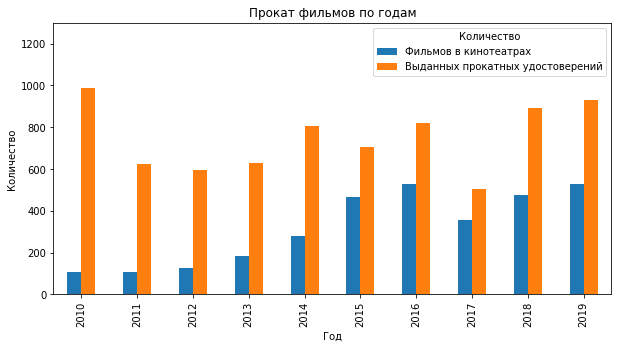

In [48]:
movies.pivot_table(index = 'year', 
                   values = ['title','box_office'], 
                   aggfunc = {'count'}). \
       plot(kind = 'bar', 
            title = 'Прокат фильмов по годам',
            xlabel = 'Год',
            ylabel = 'Количество',            
            figsize = (10,5), 
            ylim = (0,1300)). \
            legend(['Фильмов в кинотеатрах','Выданных прокатных удостоверений'], title="Количество")
plt.show()

Из графика видно, что не все фильмы, которые получили прокатные удостоверения, были показаны в кинотеатрах. Или по крайней мере не о всех фильмах есть информация, что они были показаны в кинотеатрах.

Посмотрим, какую долю от всех фильмов составляют те, о которых есть информация о прокате в кинотеатрах.

In [49]:
box_office = movies['box_office'].count()
total = len(movies)
part = (box_office / total).round(2)
print(f'Доля фильмов с указанной информацией о прокате в кинотеатрах: {part}')

Доля фильмов с указанной информацией о прокате в кинотеатрах: 0.42


Посмотрим, как эта доля менялась с годами.

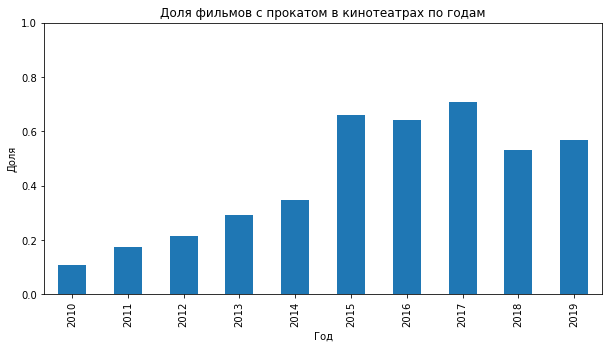

In [50]:
part_year = movies.groupby('year')['box_office'].count() / movies.groupby('year')['year'].count()
part_year.plot(kind = 'bar',
               title = 'Доля фильмов с прокатом в кинотеатрах по годам',
               xlabel = 'Год',
               ylabel = 'Доля',            
               figsize = (10,5), 
               ylim = (0,1))
plt.show()

Видно, что наиболее полная информация о фильмах, показанных в кинотеатрах, представлена за 2015, 2016, 2017 годы. А так же достаточно полная информация за годы 2018 и 2019.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Представим данные в сводной таблице по годам, отсортированной по сумме сбора от минимальной до максимальной

In [51]:
movies.pivot_table(index = 'year', values = 'box_office',aggfunc = {'sum'}).sort_values(by = 'sum')

,sum
year,
2010,2.428654e+06
2012,6.955423e+06
2011,1.410276e+07
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2019,4.842571e+10
2017,4.856371e+10


Минимальный сбор  был в 2010 году, а максимальный в 2018 году.

Представим эту информацию для наглядности в виде графика.

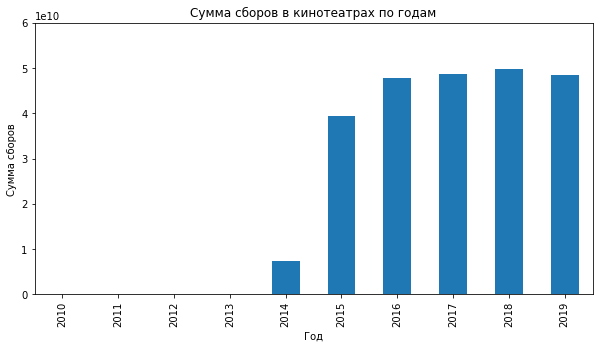

In [52]:
movies.groupby('year')['box_office'].sum(). \
       plot(kind = 'bar',
            title = 'Сумма сборов в кинотеатрах по годам',
            xlabel = 'Год',
            ylabel = 'Сумма сборов',            
            figsize = (10,5), 
            ylim = (0,6*10**10))
plt.show()

Видно, что сумма сборов за годы 2016, 2017, 2018, 2019 была примерно на одном уровне

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [53]:
movies.pivot_table(index = 'year', values = 'box_office', aggfunc = {'mean','median'})

,mean,median
year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000
2018,1.045651e+08,8891102.210


<div class="alert alert-block alert-info">
    Нарисуем столбчатую диаграмму для большей наглядности
</div>


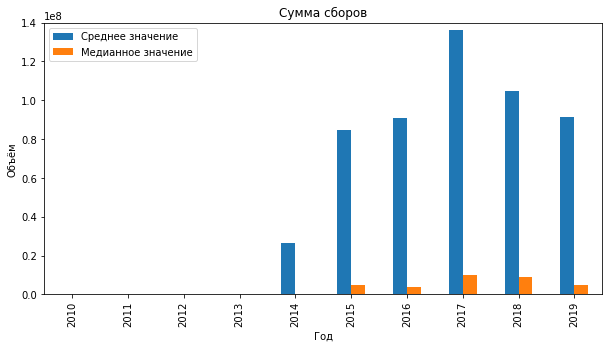

In [63]:
movies.pivot_table(index = 'year', \
                   values = 'box_office', \
                   aggfunc = {'mean','median'}).\
       plot(kind = 'bar',
            title = 'Сумма сборов',
            xlabel = 'Год',
            ylabel = 'Объём',            
            figsize = (10,5), 
            ylim = (0,1.4*10**8)). \
            legend(['Среднее значение','Медианное значение'])
plt.show()

Цифры средних и медианных значений отличаются на порядок. Думаю, это может быть связано с теми странно низкими сборами в кинотеатрах, о которых я упоминала выше.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Для каждого года в период 2015 - 2019 сгруппируем данные по столбцу "age_restriction" (возрастные ограничения") и посчитаем сумму сборов и количество фильмов.

Построим для каждого года два графика:
* круговую диаграмму распределения количества фильмов по возрастным ограничениям
* диаграмму суммы сбора для каждой возрастной категории

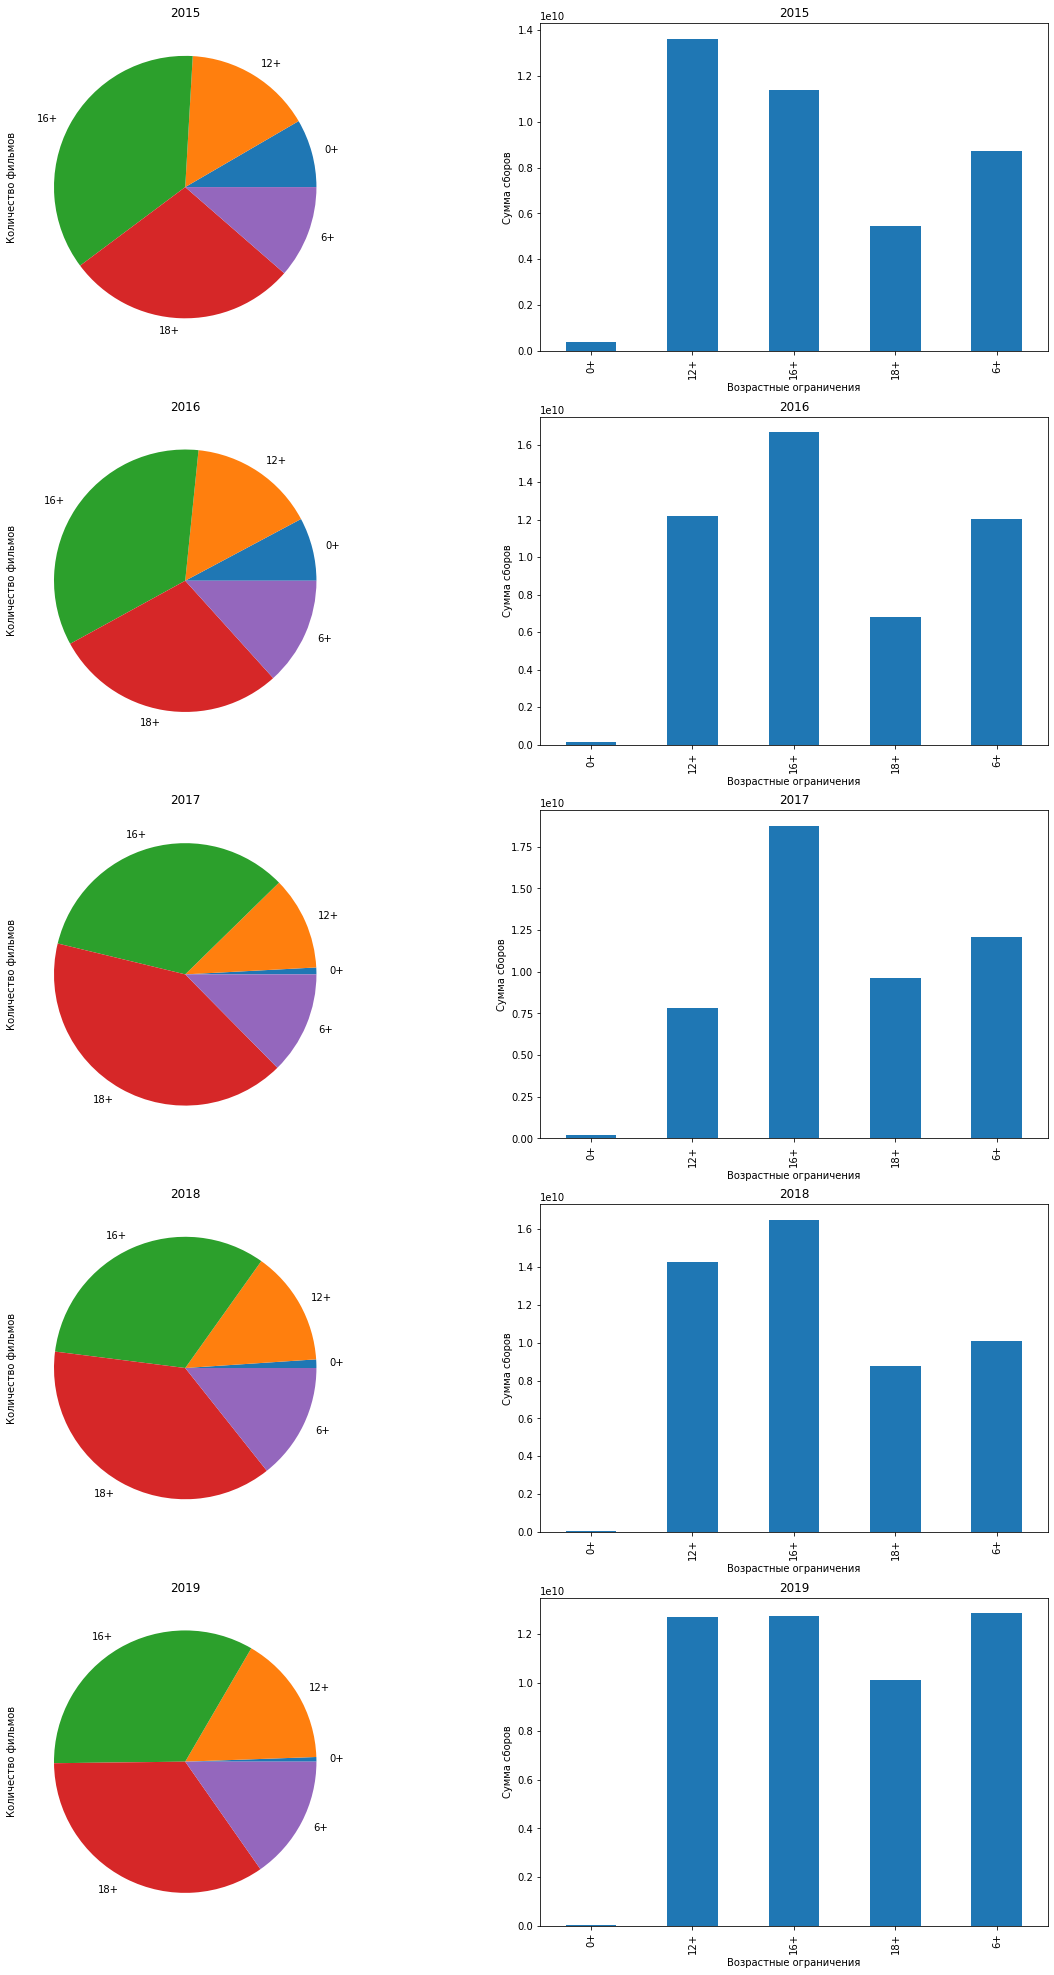

In [64]:
fig, _ = plt.subplots(nrows=5, ncols=2, figsize=(20, 35))

i = 0

for date in range(2015,2020):
    t = movies.query('year == @date'). \
    pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = {'sum', 'count'})

    t.plot(kind = 'pie', 
           y = 'count', 
           ax = fig.axes[i],
           title = date, 
           legend = False, 
           ylabel = 'Количество фильмов')
    i+=1 
    t.plot(kind = 'bar', 
           y = 'sum',
           ax = fig.axes[i],
           title = date, 
           legend = False, 
           xlabel = 'Возрастные ограничения',
           ylabel = 'Сумма сборов')
    i+=1
plt.show()
    

Сумма сборов в кинотеатрах по каждой возрастной категории  зависит в том числе от количества фильмов в этой категории.

Поэтому для анализа я нарисовала круговую диаграмму количества фильмов для каждой возрастной категории годов 2015 - 2019.

А так же столбчатую диаграмму сборов по каждой возрастной категории для этих же годов.

Я делаю следующие выводы из графиков:

2015 год: 

        * фильмов категории 16+ много, но и сборы достаточно большие
        * фильмов категории 18+ много, но сборы почти меньше всех
        * фильмов категории 0+ меньше всего, и сборы самые скромные
        * фильмов категории 12+ не так много, а вот и сборы самые высокие
       Вывод - в 2015 году зрителям больше всего понравились фильмы категории 12+
       
2016 год:

        * фильмов категории 16+ больше всего, и сборы самые большие
        * фильмов категории 18+ очень много, но сборы почти меньше всех
        * фильмов категории 0+ меньше всего, и сборы самые скромные
        * фильмов категории 12+ и 6+ не так много, а вот сборы достаточно высокие
        Вывод - в 2016 году зрителям больше всего понравились фильмы категории 12+ и 6+
        
2017 год:

        * фильмов категории 16+ много, и сборы самые большие
        * фильмов категории 18+ много, но сборы не очень большие
        * фильмов категории 0+ меньше всего, и сборы самые скромные
        * фильмов категории 12+ и 6+ не так много, и сборы не очень высокие
        Вывод - в 2017 году зрителям больше всего понравились фильмы категории 16+ и 6+
        
2018 год:

        * фильмов категории 16+ много, и сборы самые большие
        * фильмов категории 18+ много, но сборы не очень большие
        * фильмов категории 0+ меньше всего, и сборы самые скромные
        * фильмов категории 12+ не так много, но сборы достаточно высокие
        Вывод - в 2018 году зрителям больше всего понравились фильмы категории 12+ и 16
        
2019 год:

        * фильмов категории 16+ много, и сборы достаточно большие
        * фильмов категории 18+ много, но сборы не очень большие, хотя значительно подросли в сравнении с прошлыми годами
        * фильмов категории 0+ меньше всего, и сборы самые скромные
        * фильмов категории 12+ и 6+ не так много, но сборы достаточно высокие
        Вывод - в 2019 году зрителям больше всего понравились фильмы категории 6+, 12+ и 16+
        
Самыми популярными и приносящими хорошие сборы на протяжении 2015-2019 годов остаются фильмы категорий 12+ и 16+. Причем фильмы категории 16+ достигают высоких сборов количеством, а вот фильмы 12+ - качеством.

Посмотрим, фильмы какой возрастной категории дают самые большие и самые маленькие сборы.

In [65]:
movies.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = {'sum'}).sort_values(by = 'sum')

,sum
age_restriction,
0+,1.205004e+09
18+,4.297473e+10
6+,5.753073e+10
12+,6.322559e+10
16+,7.658367e+10


Как и предполагалось ранее, самая маленькая сумма сбора у возрастной категории 0+, а самая большая - у 16+

Построим  графики подобные тем, что чуть выше, для возрастных категорий, где на круговой диаграмме покажем количество фильмов в категории по годам, а на столбчатой диаграмме покажем сумму сборов по годам для возрастной категории

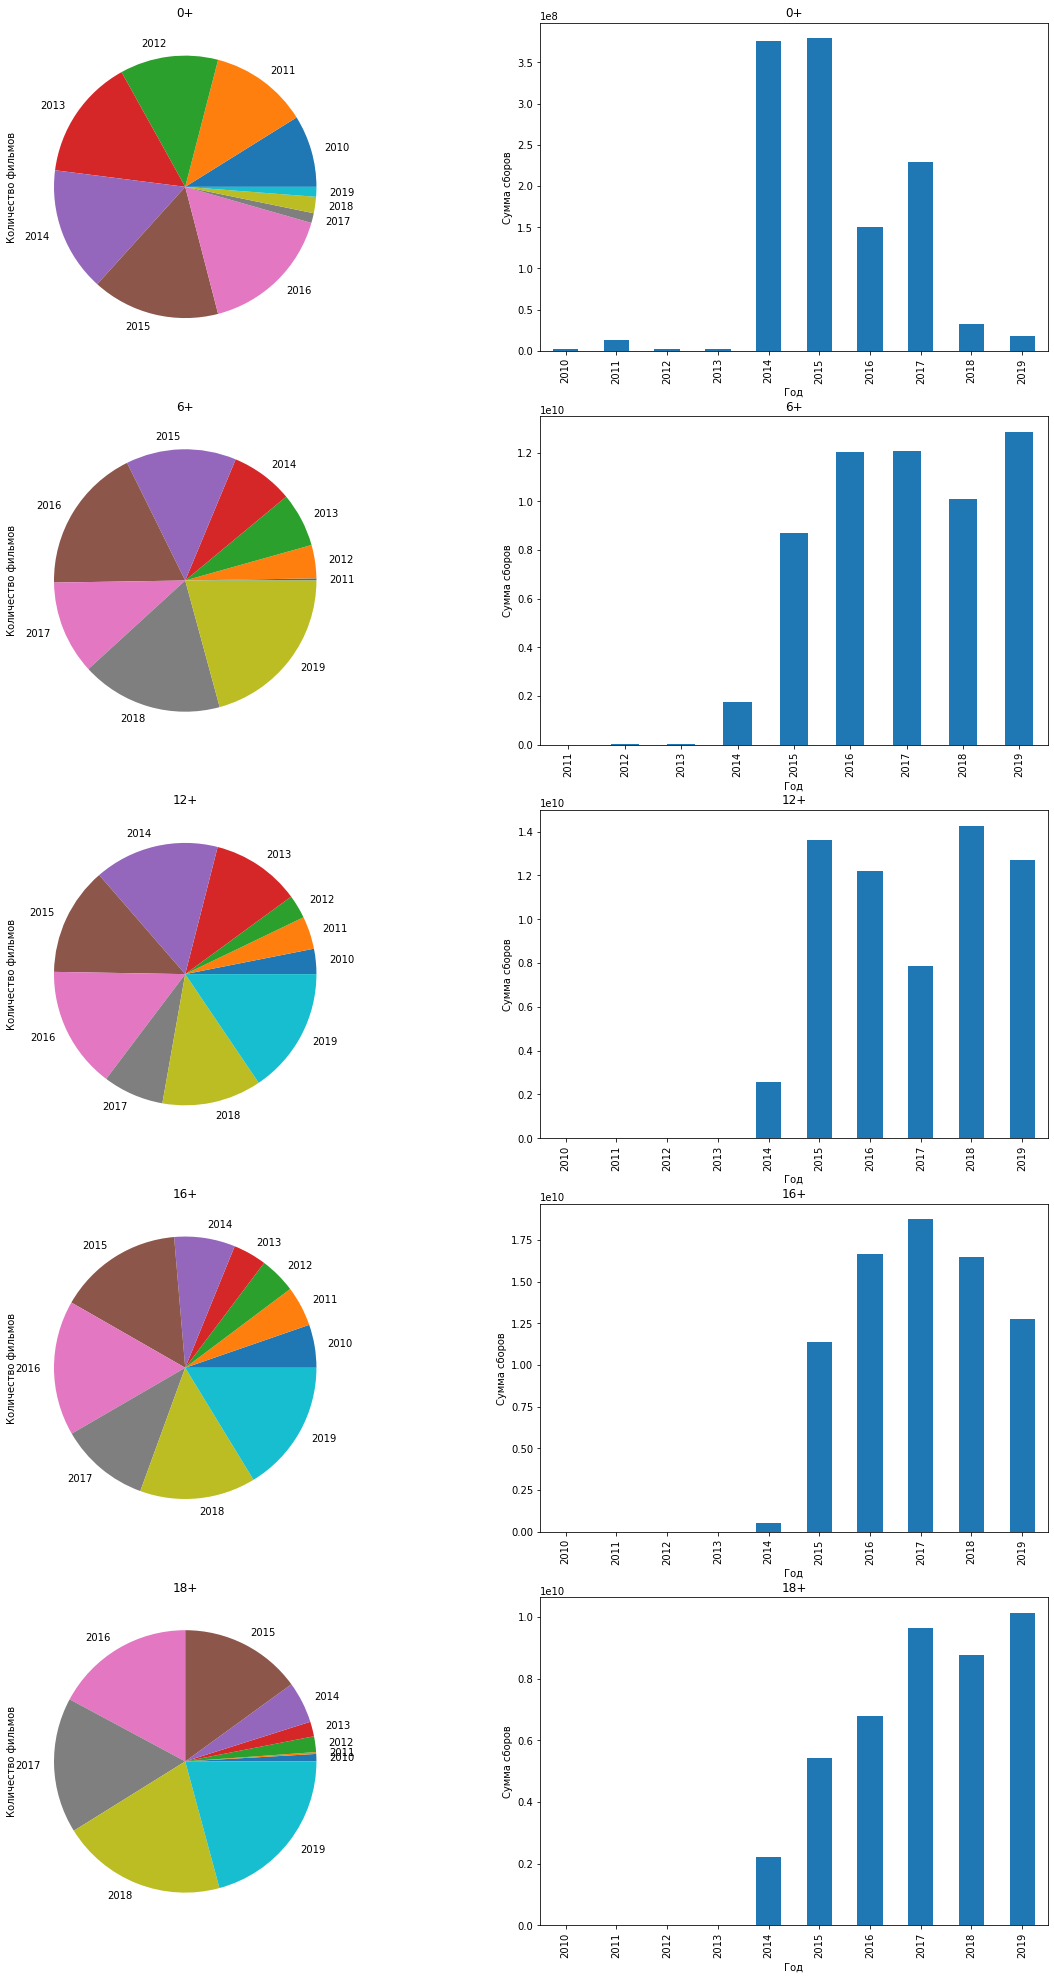

In [66]:
fig, _ = plt.subplots(nrows=5, ncols=2, figsize=(20, 35))

i = 0
for age in ['0+','6+','12+','16+','18+']:
    t = movies.query('age_restriction == @age'). \
    pivot_table(index = 'year', values = 'box_office', aggfunc = {'sum','count'})
    
    t.plot(kind = 'pie', 
           y = 'count',
           ax = fig.axes[i],
           title = age, 
           legend = False, 
           ylabel = 'Количество фильмов')
    i+=1
    t.plot(kind = 'bar', 
           y = 'sum',
           ax = fig.axes[i],
           title = age, 
           legend = False, 
           xlabel = 'Год',
           ylabel = 'Сумма сборов')
    i+=1
plt.show()

Количество фильмов в категории 0+ за 2010-2016 было примерно одинаковое, но сборы самые высокие были за 2014 и 2015 годы.
Количество фильмов за 2017 год было значительно меньше, чем раньше, но сборы при этом достаточно большие.
В 2018 и 2019 крайне мало снято фильмов, поэтому и сборов мало.

В категории 6+ все очень пропорционально. Ели в году мало снято фильмов, то и сумма сборов мала, если фильмов снято больше, то и сумма сборов подрастает

В категории 12+ в 2010 - 2012 фильмов снято мало, сборы минимальны. В 2013 году фильмов сняли больше, но сборы не выросли (наверное подкачало качество или реклама). В 2014 году снято много, сборов маловато. Резкий рост суммы сборов наблюдается в 2015 году, когда количество фильмов по сравнению с предыдущим годом даже чуть меньше, а сборы резко выросли. В 2016, 2017 года все пропорционально - мало фильмов, мало сборов. В 2018 году ситуация похожа на 2015 год - фильмов не так много, сборы самые максимальные. В 2019 году все пропорционально.

В категории 16+ все довольно пропорционально. Выделяется только 2017 год, где количество фильмов меньше, чем в предыдущие пару лет и последующие пару лет, а вот сборы самые максимальные.

В категории 18+ все выглядит пропорционально. Мало фильмов - мало сборов, много фильмов - много сборов.

**Вывод:** в 2010 - 2013 годах количество фильмов во всех категориях было мало, поэтому и суммы сборов малы. Интересен 2017 год, особенно в категориях 0+ и 16+, фильмов снято мало, а сборы большие. Интересно в категории 12+ годы 2015 и 2018 - фильмов снято немного,а сборы большие. В остальном ситуация пропорциональная - сняли мало, мало собрали, сняли много, много собрали.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Добавлю столбец с полной суммой гос.поддержки (возвратные и невозвратные средства)

In [67]:
movies['budget_gos'] = movies['nonrefundable_support'] + movies['refundable_support']

Создам отдельный датасет, где будут данные только о фильмах, получивших гос.поддержку

In [68]:
movies_gos = movies.query('financing_source != "No"')
movies_gos

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,budget_gos
1281,пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16+,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,26500000.0
1448,бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12+,0.0,26000000.0,37142857.0,Министерство культуры,NaN,unknown,2.814000e+04,2014,А.Якимчук,unknown,26000000.0
1498,невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12+,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,107847945.0
1524,берцы,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16+,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,28000000.0
1792,братья ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16+,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,25000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",12+,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,500000000.0
7466,иван царевич и серый волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",6+,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,100000000.0
7474,вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",12+,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,500000000.0
7476,я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,12+,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,30000000.0


Построю два графика.

Первый - круговая диаграмма, показывающая количество фильмов, выпущенных в каждом году. 

Второй - столбчатая диаграмма, отображающая сумму сборов в каждом году.

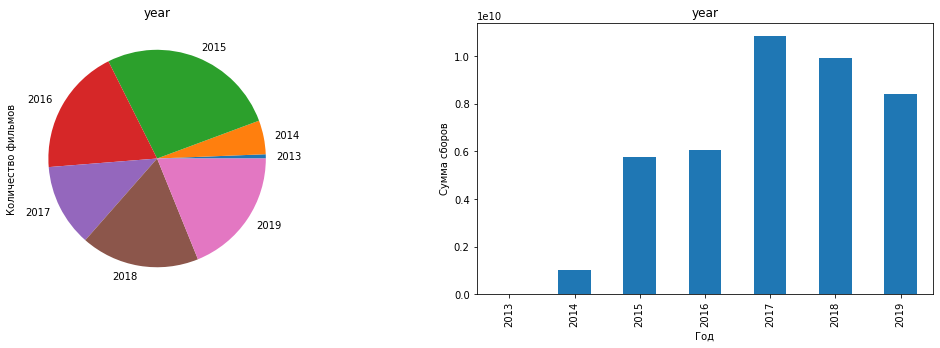

In [69]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(18, 5))

movies_gos.pivot_table(index = 'year', values = 'box_office', aggfunc = {'count'}). \
           plot(kind = 'pie', 
                y = 'count',
                ax = ax1,
                title = 'year',
                legend = False,
                ylabel = 'Количество фильмов')

movies_gos.pivot_table(index = 'year', values = 'box_office', aggfunc = {'sum'}). \
           plot(kind = 'bar',
                y = 'sum',
                ax = ax2,
                title = 'year', 
                legend = False, 
                xlabel = 'Год',
                ylabel = 'Сумма сборов')
plt.show()

Видно, что 2015 год бы неудачным, т.к. фильмов снято много (больше всего из представленных тут данных), а сборы достаточно низкие. Удачным был 2017 год - фильмов снято меньше, чем в предыдущие пару лет и последующие пару лет, а сборы самые максимальные. Остальные годы довольно пропорциональны.

Построю график и посмотрю, как соотносятся суммы возвратной и невозвратной частей гос.поддержки

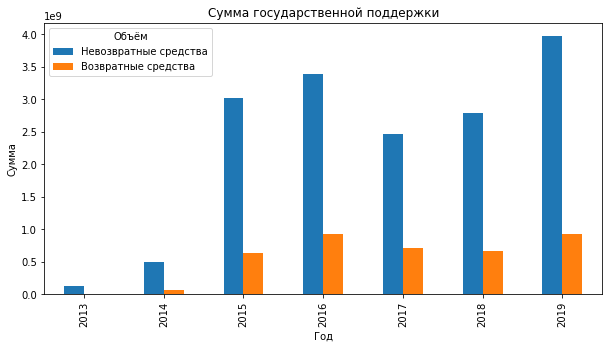

In [70]:
movies_gos.pivot_table(index = 'year', \
                       values = ['nonrefundable_support','refundable_support'], \
                       aggfunc = {'sum'}). \
           plot(kind = 'bar',
                title = 'Сумма государственной поддержки',
                xlabel = 'Год',
                ylabel = 'Сумма',
                figsize = (10,5)). \
                legend(['Невозвратные средства','Возвратные средства'], title="Объём")
plt.show()


Из графика видно, что объем невозвратных средств значительно больше, чем возвратных средств. Видно, что больше всего государство выделило средств в 2019 году.

Построю график и посмотрю, как соотносятся общий бюджет фильма, сумма гос.поддержки и кассовые сборы

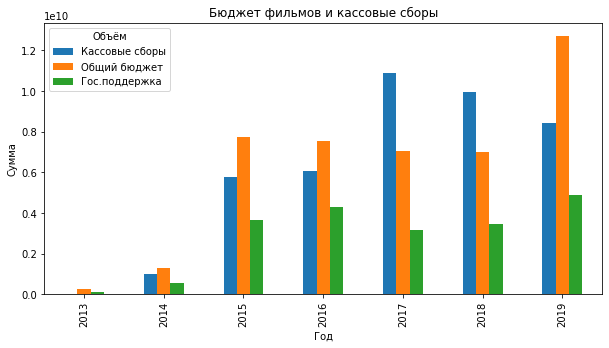

In [71]:
movies_gos.pivot_table(index = 'year', 
                       values = ['box_office','budget','budget_gos'], 
                       aggfunc = {'sum'}). \
           plot(kind = 'bar',
                title = 'Бюджет фильмов и кассовые сборы',
                xlabel = 'Год',
                ylabel = 'Сумма',
                figsize = (10,5)). \
                legend(['Кассовые сборы','Общий бюджет','Гос.поддержка'], title="Объём")
plt.show()


Из этого графика видно, что фильмы окупились в прокате только в 2017 и 2018 году. 

Самый большой провал в окупаемости фильмов был в 2019 году - самый высокий уровень гос.поддержки и самые высокобюджетные фильмы, но они не окупились, а сборы были даже меньше, чем в предыдущие два года.

Посмотрим, коррелируют ли между собой бюджет фильма и его кассовые сборы

In [72]:
movies_gos['box_office'].corr(movies_gos['budget'])

0.3756313274654145

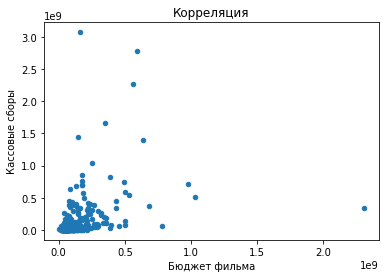

In [75]:
movies_gos.plot(kind = 'scatter', 
                x = 'budget', 
                y = 'box_office', 
                xlabel = 'Бюджет фильма', 
                ylabel = 'Кассовые сборы',
                title = 'Корреляция')
plt.show()

Видно, что у фильмов с небольшим бюджетом есть корреляция с невысоким кассовым сбором. Есть отдельные фильмы с огромным бюджетом, но очень низкими сборами, и наоборот: бюджет небольшой, а сборы достаточно приличные.

Посмотрим, что это за фильмы

In [76]:
movies_gos.loc[(movies_gos['box_office'] > 1.4*10**9) | (movies_gos['budget'] > 1.4*10**9)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,budget_gos
2920,экипаж .,111005416,2016-03-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6+,50000000.0,392104482.0,6.352839e+08,Фонд кино,7.6,"драма,триллер,приключения",1.402255e+09,2016,Н.Лебедев,драма,442104482.0
5505,последний богатырь,111007017,2017-10-19 12:00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",12+,50000000.0,50000000.0,3.524776e+08,Фонд кино,6.8,"комедия,фэнтези,приключения",1.655038e+09,2017,Д.Дьяченко,комедия,100000000.0
5653,движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6+,0.0,400000000.0,5.901922e+08,Фонд кино,7.5,"спорт,драма",2.779686e+09,2017,А.Мегердичев,спорт,400000000.0
5708,лёд,111000518,2018-02-01 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",12+,25000000.0,60000000.0,1.485852e+08,Фонд кино,NaN,unknown,1.445732e+09,2018,О.Трофим,unknown,85000000.0
6549,т-34,111024918,2018-12-21 12:00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",12+,60000000.0,120000000.0,5.637847e+08,Фонд кино,6.5,"драма,военный,боевик",2.271754e+09,2018,А.Сидоров,драма,180000000.0
7114,тайна печати дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",6+,180000000.0,90000000.0,2.305074e+09,Фонд кино,5.8,"приключения,фэнтези",3.335971e+08,2019,О.Степченко,приключения,270000000.0
7456,холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",12+,25000000.0,35000000.0,1.600000e+08,Фонд кино,6.8,комедия,3.073569e+09,2019,К.Шипенко,комедия,60000000.0


Действительно, в списке оказались фильмы, которые на слуху, которые были популярны у зрителей.

Посмотрим, есть ли корреляция между рейтингом фильма на Кинопоиске и кассовыми сборами

In [77]:
movies_gos['box_office'].corr(movies_gos['ratings'])

0.14375541497787275

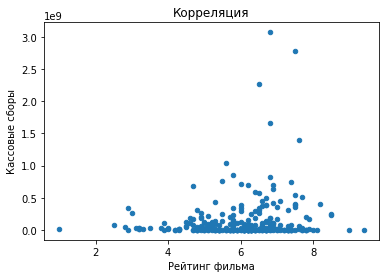

In [78]:
movies_gos.plot(kind = 'scatter', 
                x = 'ratings', 
                y = 'box_office', 
                xlabel = 'Рейтинг фильма', 
                ylabel = 'Кассовые сборы',
                title = 'Корреляция')
plt.show()

Видно, что корреляции нет. Много фильмов имеют довольно высокий рейтинг на Кинопоиске (от 6), но кассовые сборы у них очень низкие. Есть всего несколько фильмов, которые имеют и высокий рейтинг, и собрали хорошие кассовые сборы.

Скорее всего это говорит о том, что люди в кинотеатрах и дома смотрят и воспринимают фильмы по разному. Т.е. фильм дома на диване бесплатно можно посмотреть и достаточно высоко оценить, но этот же фильм в кинотеатр смотреть не пойдут.

Посмотрим, какие фильмы собрали более 1 млрд рублей и у которых рейтинг выше 6.0

In [79]:
movies_gos.loc[(movies_gos['box_office'] > 1.0*10**9) & (movies_gos['ratings'] > 6.0)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,budget_gos
2920,экипаж .,111005416,2016-03-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6+,50000000.0,392104482.0,635283867.0,Фонд кино,7.6,"драма,триллер,приключения",1.402255e+09,2016,Н.Лебедев,драма,442104482.0
5505,последний богатырь,111007017,2017-10-19 12:00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",12+,50000000.0,50000000.0,352477575.0,Фонд кино,6.8,"комедия,фэнтези,приключения",1.655038e+09,2017,Д.Дьяченко,комедия,100000000.0
5653,движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6+,0.0,400000000.0,590192191.0,Фонд кино,7.5,"спорт,драма",2.779686e+09,2017,А.Мегердичев,спорт,400000000.0
6549,т-34,111024918,2018-12-21 12:00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",12+,60000000.0,120000000.0,563784717.0,Фонд кино,6.5,"драма,военный,боевик",2.271754e+09,2018,А.Сидоров,драма,180000000.0
7456,холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",12+,25000000.0,35000000.0,160000000.0,Фонд кино,6.8,комедия,3.073569e+09,2019,К.Шипенко,комедия,60000000.0


Посмотрим общую информацию о рейтинге

In [80]:
movies_gos['ratings'].describe()

count    316.000000
mean       6.020886
std        1.148943
min        1.000000
25%        5.300000
50%        6.200000
75%        6.700000
max        9.400000
Name: ratings, dtype: float64

Средняя и медианная оценка довольно близки, примерно 6 баллов. Минимальный балл 1, максимальный 9.4

Посмотрим, что это за фильмы, какие у них бюджеты и кассовые сборы

In [81]:
movies_gos.loc[(movies_gos['ratings'] == movies_gos['ratings'].max()) | (movies_gos['ratings'] == movies_gos['ratings'].min())]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,budget_gos
2146,главный,111003415,2015-03-27 12:00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,6+,0.0,10000000.0,40000000.0,Министерство культуры,9.4,"фантастика,боевик,комедия",334750.0,2015,Ю.Кара,фантастика,10000000.0
3515,взломать блогеров,111016616,2016-10-28 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,М.Свешников,Т.Бекмамбетов,6+,0.0,25000000.0,36016269.0,Фонд кино,1.0,"комедия,мультфильм,фантастика",7323648.0,2016,М.Свешников,комедия,25000000.0


Фильм с самым низким рейтингом на Кинопоиске собрал в кинотеатрах на порядок больше, чем фильм с самым высоким рейтингом. Бюджеты обоих фильмов сравнимы.

Посмотрим, какие жанры фильмов приносят самые большие сборы, а так же, на фильмы каких жанров тратятся самые большие бюджеты

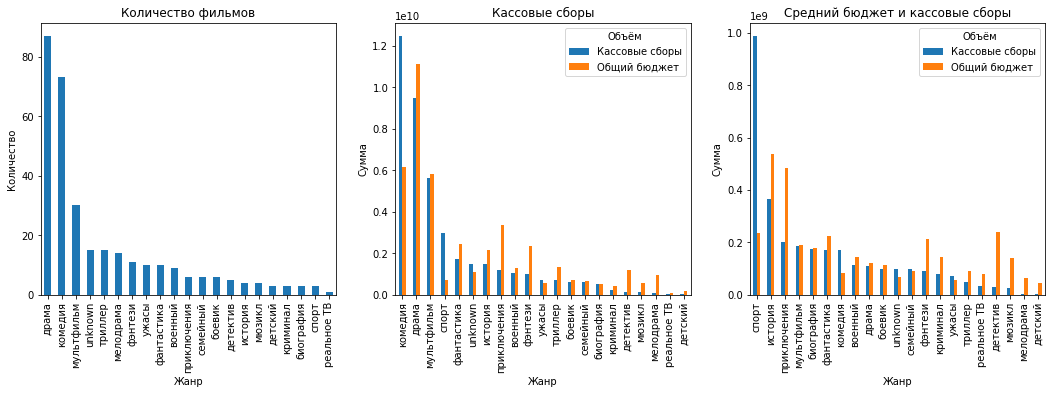

In [97]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(18, 5))

movies_gos.pivot_table(index = 'main_genre', \
                       values = 'box_office', \
                       aggfunc = {'count'}). \
           sort_values(by = 'count', ascending = False). \
           plot(kind = 'bar',
                ax = ax1,
                title = 'Количество фильмов',
                xlabel = 'Жанр',
                ylabel = 'Количество',
                legend = False)

movies_gos.pivot_table(index = 'main_genre', \
                       values = ['box_office', 'budget'], \
                       aggfunc = {'sum'}). \
           sort_values(by = ('box_office','sum'), ascending = False). \
           plot(kind = 'bar',
                ax = ax2,
                title = 'Кассовые сборы',
                xlabel = 'Жанр',
                ylabel = 'Сумма'). \
                legend(['Кассовые сборы','Общий бюджет'], title="Объём")

movies_gos.pivot_table(index = 'main_genre', \
                       values = ['box_office', 'budget'], \
                       aggfunc = {'mean'}). \
           sort_values(by = ('box_office','mean'), ascending = False). \
           plot(kind = 'bar',
                ax = ax3,
                title = 'Средний бюджет и кассовые сборы',
                xlabel = 'Жанр',
                ylabel = 'Сумма'). \
                legend(['Кассовые сборы','Общий бюджет'], title="Объём")
plt.show()

Из графиков видно:
* больше всего снимают фильмов в жанрах драма, комедия и мультфильм
* в кинотеатрах эти же жанры популярны. 
* при этом комедии хорошо окупаются, мультфильмы - без прибыли (сколько потратили, столько и собрали), а драмы не окупаются (бюджет больше кассовых сборов)
* из остальных жанров окупаются только спортивные, остальные в убытке
* самый высокий средний кассовый сбор у фильмов жанра спорт. Хотя таких фильмов снимают очень мало, но они малобюджетны (что в общем, что в среднем), но окупаются они очень хорошо
* самые плохоокупаемые фильмы жанров история и приключения. Их снимают мало, но они высокобюджетные (и в общем, и в среднем), а кассовые сборы не окупают бюджет.

### Шаг 5. Напишите общий вывод

**Исследование проводится по заказу Министерства культуры Российской Федерации**

**Цель:**

        * изучить рынок российского кинопроката и выявить текущие тренды
        
**Задачи:**

        * проанализировать динамику проката по годам
        * рассмотреть зависимость кассовых сборов в кинотеатрах от возрастных ограничений
        * выявить особенности кинопроката фильмов, получивших гос.поддержку
        
Для проведения исследования были получены два датасета. Первый - с информацией о прокатных удостоверениях, второй - о прокате в российских кинотеатрах.

Первым делом я объединила два датасета, чтобы вся нужная информация была в одном месте.

**Далее я провела предобработку данных:**
1. Столбец "show_start_date" привела к стандартному типу datetime
2. В столбце "age_restriction" упростила записи для удобства работы
3. Убрала мусор в данных (%, пробелы) в столбцах "ratings", "type", "film_studio", "genres"
4. В столбце "ratings" данные были записаны в разных формах. Привела все к типу данных float и десятибальной шкале.
5. Привела к нижнему регистру значения в столбце "title"
4. Обнаружила пропуски в столбцах:
    * film_studio
    * production_country
    * director
    * producer   
    * refundable_support       
    * nonrefundable_support    
    * budget  
    * financing_source      
    * ratings      
    * genres      
    * box_office
5. В столбцах "film_studio", "production_country", "director", "producer", "genres" пропуски заполним значением "unknown", т.к. никак логически эти пропуски не заполнить
6. В столбцах "refundable_support", "nonrefundable_support", "budget" пропуски заполним 0, т.к. там, где пропущены значения, фильмы не имеют гос.поддержки. 
7. В столбце "financing_source" указана организация, которая оказала гос.поддержку. Если значение пропущено, значит нет гос.поддержки, нет организации, поэтому заполним пропуски значением 'No'
8. Остались пропущенные значения в столбцах "ratings" и "box_office". Их заполнить можно только вручную, осуществив поиск в интернете, а логически никак нельзя заполнить, поэтому оставим пропуски в этих столбцах.
9. Удалила явные дубликаты
10. Поработала с неявными ошибками, а именно в ячейки столбца "budget" записала сумму столбцов "refundable_support" и "nonrefundable_support" в тех случаях, когда значения в столбце "budget" были меньше чем средства гос.поддержки

**После того, как данные приведены к нужному виду, я провела исследовательский анализ:**
1. Создала три новых столбца:
        'year' - с информацией о годе проката
        'main_director' - с именем и фамилией главного режиссёра
        'main_genre' - с основным жанром фильма
2. посчитала, что в среднем доля гос.поддержки от общего бюджета фильма составляет 0.54. В исследовании есть данные о доле для всех фильмов, получивших гос.поддержку
3. В данных представлена не вся информация о прокате в кинотеатрах. Доля фильмов с указанной информацией о прокате в кинотеатрах 0.42. Наиболее полная информация о прокате представлена за 2015, 2016, 2017 годы. так же достаточно полная информация за годы 2018 и 2019.
4. Выяснила, что минимальный кассовый сбор был в 2010 году, а максимальный - в 2018 году.
5. Далее я для каждого года в период 2015 - 2019 сгруппировала данные по столбцу "age_restriction" (возрастные ограничения") и посчитала сумму сборов и количество фильмов. Эти данные представлены в виде графиков:
        * круговая диаграмма распределения количества фильмов по возрастным категориям
        * столбчатая диаграмма суммы сбора для каждой возрастной категории
        
*Выводы по каждому году:* 
        
   в **2015** году зрителям больше всего понравились фильмы категории 12+  
   
   в **2016** году зрителям больше всего понравились фильмы категории 12+ и 6+
   
   в **2017** году зрителям больше всего понравились фильмы категории 16+ и 6+
   
   в **2018** году зрителям больше всего понравились фильмы категории 12+ и 16+
   
   в **2019** году зрителям больше всего понравились фильмы категории 6+, 12+ и 16+
    
**Общий вывод:** 

**Самыми популярными и приносящими хорошие сборы на протяжении 2015-2019 годов остаются фильмы категорий 12+ и 16+. 
Причем фильмы категории 16+ достигают высоких сборов количеством, а вот фильмы 12+ - качеством.**
          
6. Так же я построила графики подобные тем, что выше: для каждой возрастной категории сгруппировала данные по годам 2015 - 2019,  на круговой диаграмме показала количество фильмов в категории по годам, а на столбчатой диаграмме показала сумму сборов по годам для возрастной категории.

*Выводы для каждой категории:*

  **0+:** Количество фильмов за 2010-2016 было примерно одинаковое, но сборы самые высокие были за 2014 и 2015 годы. Количество фильмов за 2017 год было значительно меньше, чем раньше, но сборы при этом достаточно большие. В 2018 и 2019 крайне мало снято фильмов, поэтому и сборов мало.
  
  **6+:** Здесь все очень пропорционально. Ели в году мало снято фильмов, то и сумма сборов мала, если фильмов снято больше, то и сумма сборов подрастает.
  
  **12+:** в 2010 - 2012 фильмов снято мало, сборы минимальны. В 2013 году фильмов сняли больше, но сборы не выросли. В 2014 году снято много, сборов маловато. Резкий рост суммы сборов наблюдается в 2015 году, когда количество фильмов по сравнению с предыдущим годом даже чуть меньше, а сборы резко выросли. В 2016, 2017 года все пропорционально - мало фильмов, мало сборов. В 2018 году ситуация похожа на 2015 год - фильмов не так много, сборы самые максимальные. В 2019 году все пропорционально.
  
  **16+:** Здесь все довольно пропорционально. Выделяется только 2017 год, где количество фильмов меньше, чем в предыдущие пару лет и последующие пару лет, а вот сборы самые максимальные.
  
  **18+:** Здесь все выглядит пропорционально. Мало фильмов - мало сборов, много фильмов - много сборов.
  
**Общий вывод:** 

**В 2010 - 2013 годах количество фильмов во всех категориях было мало, поэтому и суммы сборов малы. Интересен 2017 год, особенно в категориях 0+ и 16+, фильмов снято мало, а сборы большие. Интересны в категории 12+ годы 2015 и 2018 - фильмов снято немного, а сборы большие. В остальном ситуация пропорциональная - сняли мало, мало собрали, сняли много, много собрали.**

7. Далее я исследовала только фильмы, получившие гос.поддержку. 

- Построила два графика:
            * круговая диаграмма, показывающая количество фильмов, выпущенных в каждом году.
            * столбчатая диаграмма, отображающая сумму сборов в каждом году.

           Из них видно, что 2015 год бы неудачным, т.к. фильмов выпущено больше всего, а сборы достаточно низкие. Удачным был 2017 год - фильмов снято меньше, чем в предыдущие пару лет и последующие пару лет, а сборы самые максимальные. Остальные годы довольно пропорциональны.

- Построила график, на котором видно, что объем невозвратных средств значительно больше, чем возвратных средств. Также видно, что больше всего государство выделило средств в 2019 году.
 
 
- Построила столбчатую диаграмму, отображающую общий бюджет фильмов, сумму гос.поддержки и кассовые сборы в разбивке по годам.
Из этого графика видно, что фильмы окупились в прокате только в 2017 и 2018 году. Самый большой провал в окупаемости фильмов был в 2019 году - самый высокий уровень гос.поддержки и самые высокобюджетные фильмы, но они не окупились, а сборы были даже меньше, чем в предыдущие два года.


- Посмотрела корреляцию между бюджетом фильма и кассовыми сборами. Видно, что у фильмов с небольшим бюджетом есть корреляция с невысоким кассовым сбором. Но при этом есть отдельные фильмы с огромным бюджетом, но очень низкими сборами, и наоборот: бюджет небольшой, а сборы достаточно приличные. Например, фильмы "Экипаж", "Последний богатырь", "Движение вверх", "Лёд", "Т-34", "Холоп" - при не самых высоких бюджетах очень хорошо окупились. И действительно, эти фильмы на слуху.
 
 
- Посмотрела корреляцию между рейтингом фильма на Кинопоиске и кассовыми сборами. Тут корреляции нет. Много фильмов имеют довольно высокий рейтинг на Кинопоиске (от 6.0), но кассовые сборы у них очень низкие. Есть всего несколько фильмов, которые имеют и высокий рейтинг, и собрали хорошие кассовые сборы. И это опять те же фильмы: "Экипаж", "Последний богатырь", "Движение вверх", "Т-34", "Холоп"
 
 
- Изучила информацию о рейтингах. Средний рейтинг 6.0, минимальный 1.0, максимальный 9.4. Фильм с самым низким рейтингом на Кинопоиске собрал в кинотеатрах на порядок больше, чем фильм с самым высоким рейтингом. Бюджеты обоих фильмов сравнимы.


- Изучила информацию о жанрах: какие жанры фильмов приносят самые большие сборы, на фильмы каких жанров тратятся самые большие бюджеты. И графиков видно:

        * больше всего снимают фильмов в жанрах драма, комедия и мультфильм
        * в кинотеатрах эти же жанры популярны. 
        * при этом комедии хорошо окупаются, мультфильмы - без прибыли (сколько потратили, столько и собрали), а драмы не окупаются (бюджет больше кассовых сборов)
        * из остальных жанров окупаются только спортивные, остальные в убытке
        * самый высокий средний кассовый сбор у фильмов жанра спорт. Хотя таких фильмов снимают очень мало, но они малобюджетны (что в общем, что в среднем), но окупаются они очень хорошо
        * самые плохоокупаемые фильмы жанров история и приключения. Их снимают мало, но они высокобюджетные (и в общем, и в среднем), а кассовые сборы не окупают бюджет.
        
**Общий вывод:**

    Фильмы, которые снимаются при поддержке государства, чаще всего не окупаются в прокате. 
    Объём невозвратных средств гораздо выше, чем возвратных, думаю поэтому создателям фильмов нет стимула стремиться снимать кино, которое будет окупаться в прокате. 
    Самые популярные жанры - комедия, драма и мультфильмы.
    Самый окупаемый жанр - спортивный. Я бы рекомендовала увеличить производство фильмов этого жанра.
    Чаще всего зрители смотрят фильмы категории 12+ и 16+.
